In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition_v2.csv')

df2 = pd.get_dummies(df["Gender"])
df["GenderNumeric"] = df2["Male"]

df2 = pd.get_dummies(df["OverTime"])
df["OverTimeNumeric"] = df2["Yes"]

pd.set_option('display.max_column',30)
pd.set_option('display.max_rows',10)

df.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,GenderNumeric,OverTimeNumeric
0,41,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,2,Sales Executive,4,Single,5993,8,Yes,3,1,8,0,1,6,4,0,5,0,1
1,49,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,2,Research Scientist,2,Married,5130,1,No,4,4,10,3,3,10,7,1,7,1,0
2,37,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Yes,3,2,7,3,3,0,0,0,0,1,1
3,33,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,1,Research Scientist,3,Married,2909,1,Yes,3,3,8,3,3,8,7,3,0,0,1
4,27,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,1,Laboratory Technician,2,Married,3468,9,No,3,4,6,3,3,2,2,2,2,1,0


In [2]:
corr = df.corr()
corr

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,GenderNumeric,OverTimeNumeric
Age,1.000000,-0.001686,0.208034,0.010146,0.029820,0.509604,-0.004892,0.497855,0.299635,0.001904,0.053535,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,-0.036311,0.028062
DistanceFromHome,-0.001686,1.000000,0.021042,-0.016075,0.008783,0.005303,-0.003669,-0.017014,-0.029251,0.027110,0.006557,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,-0.001851,0.025514
Education,0.208034,0.021042,1.000000,-0.027128,0.042438,0.101589,-0.011296,0.094961,0.126317,-0.024539,-0.009118,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,-0.016547,-0.020322
EnvironmentSatisfaction,0.010146,-0.016075,-0.027128,1.000000,-0.008278,0.001212,-0.006784,-0.006259,0.012594,-0.029548,0.007665,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999,0.000508,0.070132
JobInvolvement,0.029820,0.008783,0.042438,-0.008278,1.000000,-0.012630,-0.021476,-0.015271,0.015012,-0.029071,0.034297,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976,0.017960,-0.003507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YearsInCurrentRole,0.212901,0.018845,0.060236,0.018007,0.008717,0.389447,-0.002305,0.363818,-0.090754,0.034986,-0.015123,0.460365,-0.005738,0.049856,0.758754,1.000000,0.548056,0.714365,-0.041483,-0.029758
YearsSinceLastPromotion,0.216513,0.010029,0.054254,0.016194,-0.024184,0.353885,-0.018214,0.344978,-0.036814,0.017896,0.033493,0.404858,-0.002067,0.008941,0.618409,0.548056,1.000000,0.510224,-0.026985,-0.012239
YearsWithCurrManager,0.202089,0.014406,0.069065,-0.004999,0.025976,0.375281,-0.027656,0.344079,-0.110319,0.022827,-0.000867,0.459188,-0.004096,0.002759,0.769212,0.714365,0.510224,1.000000,-0.030599,-0.041586
GenderNumeric,-0.036311,-0.001851,-0.016547,0.000508,0.017960,-0.039403,0.033252,-0.031858,-0.039147,-0.013859,0.022868,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599,1.000000,-0.041924


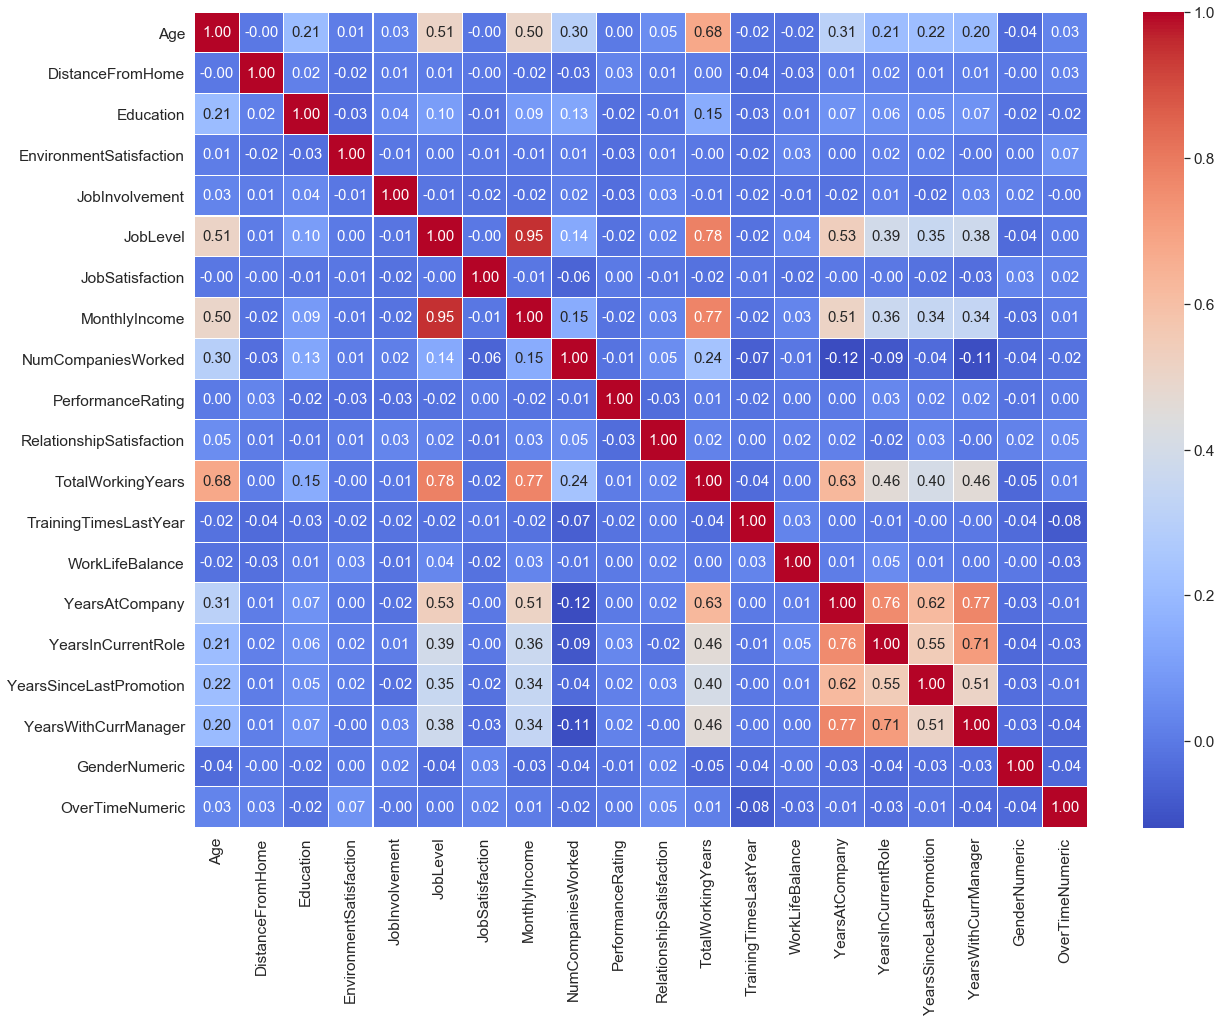

In [3]:
sns.set(font_scale=1.4)
fig, (ax) = plt.subplots(figsize=(20,15))
matrix = sns.heatmap(corr, 
                 ax=ax,
                 cmap="coolwarm",
                 annot=True,
                 fmt='.2f',
                 annot_kws={"size": 15},
                 linewidths=.05)

In [ ]:
# Wybierator2000

from msvcrt import getch

print("\n Dostepne źródła danych: \n 1. Cała tabela \n 2. Wybrany fragment tabeli")
while True:
    key = ord(getch())
    if key == 49:
        wymiary_cala()
        dimension = input(" Podaj nazwę wymiaru: ")
        df_tab = df[dimension]
        df_tab.head()
        break
    elif key == 50:
        wymiary_wycinek()
        col = input(" Podaj nazwę wymiaru: ")
        print(" ")
        test_str = str((df.iloc[0][col]))
        regex = r"[a-zA-Z]"
        matches = re.search(regex, test_str)
        if matches:
            print(" Dostępne wartości to:", df[col].drop_duplicates().values.tolist())
        val = input(" Podaj wartość wymiaru: ")
        if matches:
            wartosc = val
        else:
            wartosc = int(val)
        miary_wycinek()
        measure = input(" Podaj nazwę miary: ")
        if measure != col:
            df['Count'] = df.groupby(col)[col].transform(len)
            try:
                df2 = df[df[col] == wartosc]
                if len(df2.index) == 0:
                    print("\n Brak rekordów dla wartości: [", val, "]")
                    raise ValueError
            except ValueError:
                df2 = df.iloc[(df[col] - wartosc).abs().argsort()[:1]]
                col_val = df2[col].values
                zakres = df2['Count'].values[0]
                df2 = df.iloc[(df[col] - wartosc).abs().argsort()[:zakres]]
                print(" Najbliższa pasująca wartość to: [", col_val[0], "]")
                print(" Liczba rekordów dla wartości [", col_val[0], "] wynosi: [", zakres, "]")
            df_row = df2.drop('Count', axis=1)
            df_tab = df_row[[col, measure]]
            df_tab.head()
        else:
            print("\n Wymiar oraz miara nie mogą być takie same!")
            break